In [14]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from  sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE,ADASYN

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import  make_pipeline,Pipeline
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.metrics import confusion_matrix,classification_report



In [15]:

url="https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/diabetes.csv"
df=pd.read_csv(url)

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:ylabel='Outcome'>

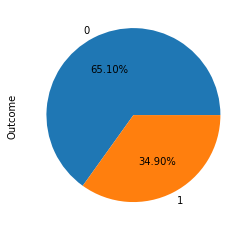

In [17]:
df["Outcome"].value_counts().plot(kind="pie",autopct='%.2f%%')

In [18]:
X=df.drop(columns="Outcome")
y=df["Outcome"]

In [19]:
featSelector=SelectKBest(chi2,k=4)
featSelector.fit(X,y)
featSelector.get_feature_names_out()

array(['Glucose', 'Insulin', 'BMI', 'Age'], dtype=object)

In [20]:
#RFE Only Work with Libnear model 
estimator=SVC(kernel="linear")
featEl=RFE(estimator, n_features_to_select=4, step=1)
featEl.fit(X,y)
featEl.get_feature_names_out()

array(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction'],
      dtype=object)

In [21]:
xopt=X[featSelector.get_feature_names_out()]
X_resampled,y_reasampled=SMOTE().fit_resample(xopt,y)
xtrian,xtest,ytrain,ytest=train_test_split(X_resampled,y_reasampled,test_size=0.25,random_state=0)

In [22]:


pipe=Pipeline([
    ("StdScalar",StandardScaler()),
    ("model",KNeighborsClassifier(algorithm="auto",n_neighbors=15,weights="uniform",leaf_size=5))
])
pipe.fit(xtrian,ytrain)
ypred=pipe.predict(xtest)

cf=confusion_matrix(ypred,ytest)
cr=classification_report(ypred,ytest)

print(f"Confusion matrix :{cf}")
print(f"Confusion report :{cr}")


Confusion matrix :[[ 96  21]
 [ 30 103]]
Confusion report :              precision    recall  f1-score   support

           0       0.76      0.82      0.79       117
           1       0.83      0.77      0.80       133

    accuracy                           0.80       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.80      0.80      0.80       250



In [23]:
xtrian.head()

,Glucose,Insulin,BMI,Age
253,86,0,35.800000,25
667,111,0,27.500000,40
85,110,125,32.400000,27
969,98,182,36.089824,45
75,0,0,24.700000,22


In [24]:


pipesv=Pipeline([
    ("StdScalar",StandardScaler()),
    ("model",SVC(degree=1))
])
pipesv.fit(xtrian,ytrain)
ypred=pipesv.predict(xtest)

cf=confusion_matrix(ypred,ytest)
cr=classification_report(ypred,ytest)

print(f"Confusion matrix :{cf}")
print(f"Confusion report :{cr}")


Confusion matrix :[[100  19]
 [ 26 105]]
Confusion report :              precision    recall  f1-score   support

           0       0.79      0.84      0.82       119
           1       0.85      0.80      0.82       131

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250



In [25]:
pipe.get_params()

{'memory': None,
 'steps': [('StdScalar', StandardScaler()),
  ('model', KNeighborsClassifier(leaf_size=5, n_neighbors=15))],
 'verbose': False,
 'StdScalar': StandardScaler(),
 'model': KNeighborsClassifier(leaf_size=5, n_neighbors=15),
 'StdScalar__copy': True,
 'StdScalar__with_mean': True,
 'StdScalar__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 5,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 15,
 'model__p': 2,
 'model__weights': 'uniform'}

In [26]:
parms={
    'model__n_neighbors':[5,10,15,20],
    'model__weights':["uniform","distance"],
    'model__algorithm':["auto", "ball_tree", "kd_tree", "brute"],
    'model__leaf_size':[5,10,15,20]

}

In [27]:
grid=GridSearchCV(pipe,parms,cv=10,n_jobs=-1)
grid.fit(xtrian,ytrain)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('StdScalar', StandardScaler()),
                                       ('model',
                                        KNeighborsClassifier(leaf_size=5,
                                                             n_neighbors=15))]),
             n_jobs=-1,
             param_grid={'model__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                              'brute'],
                         'model__leaf_size': [5, 10, 15, 20],
                         'model__n_neighbors': [5, 10, 15, 20],
                         'model__weights': ['uniform', 'distance']})

In [28]:

grid.best_params_

{'model__algorithm': 'auto',
 'model__leaf_size': 5,
 'model__n_neighbors': 15,
 'model__weights': 'distance'}

In [29]:
pipesv.get_params()


{'memory': None,
 'steps': [('StdScalar', StandardScaler()), ('model', SVC(degree=1))],
 'verbose': False,
 'StdScalar': StandardScaler(),
 'model': SVC(degree=1),
 'StdScalar__copy': True,
 'StdScalar__with_mean': True,
 'StdScalar__with_std': True,
 'model__C': 1.0,
 'model__break_ties': False,
 'model__cache_size': 200,
 'model__class_weight': None,
 'model__coef0': 0.0,
 'model__decision_function_shape': 'ovr',
 'model__degree': 1,
 'model__gamma': 'scale',
 'model__kernel': 'rbf',
 'model__max_iter': -1,
 'model__probability': False,
 'model__random_state': None,
 'model__shrinking': True,
 'model__tol': 0.001,
 'model__verbose': False}

In [30]:
parmssvc={
    'model__kernel':["linear", "poly", "rbf", "sigmoid", "precomputed"],
    'model__gamma':["scale", "auto"],
    'model__degree':[1,2,3,4,5]


}

In [31]:
gridsvc=GridSearchCV(pipesv,parmssvc,cv=10,n_jobs=-1)
gridsvc.fit(xtrian,ytrain)


c:\Python\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Python\lib\site-packages\sklearn\svm\_base.py", line 198, in fit
    raise ValueError(
ValueError: Precomputed matrix must be a square matrix. Input is a 675x4 matrix.

  warnings.warn(some_

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('StdScalar', StandardScaler()),
                                       ('model', SVC(degree=1))]),
             n_jobs=-1,
             param_grid={'model__degree': [1, 2, 3, 4, 5],
                         'model__gamma': ['scale', 'auto'],
                         'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                           'precomputed']})

In [32]:
gridsvc.best_params_

{'model__degree': 1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}

In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
pipe

Pipeline(steps=[('StdScalar', StandardScaler()),
                ('model', KNeighborsClassifier(leaf_size=5, n_neighbors=15))])

In [35]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [38]:
inp=np.array([253,86,35.800000,25])
print(pipe.predict([inp]))
print(type(pipe.predict([inp])))



[1]
<class 'numpy.ndarray'>


c:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
xtrian.head()

,Glucose,Insulin,BMI,Age
253,86,0,35.800000,25
667,111,0,27.500000,40
85,110,125,32.400000,27
969,98,182,36.089824,45
75,0,0,24.700000,22
